In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive (4).zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'/content/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**PREPROCESSING**

1.Dropping Variables : CUST_ID will be removed since it has unique values.

In [ ]:
df = df.drop('CUST_ID',axis =1)


2.**Imputation**

Since the dataset is about clustering, imputation will use KNNImputer() to avoid biased clustering results. The mean value from the nearest n_neighbors found in the dataset is used to impute the missing values for each sample.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
null_columns = df.columns[df.isnull().any()].tolist()
null_columns

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [ ]:
# --- Perform Imputation ---
imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

**Scaling**

Scaling is essential since it manages the dataset's variability, transforms data into a defined range

In [ ]:
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame(StandardScaler().fit_transform(df))

**Hopkins** **Test**

using the Hopkins statistical test for the preprocessed dataset to measure the clustering tendency of data

Hypothesis of the Hopkins statistical test.

**H0**: The dataset is not uniformly distributed (contains meaningful clusters).
**H1**: The dataset is uniformly distributed (no meaningful clusters).
**Criteria**:

If the value is between {0.7, ..., 0.99}, accept H0 (it has a high tendency to cluster).

**Visualizing Explained Variance**

Plot helps analyze how many principal components are needed to retain a significant amount of data's variance

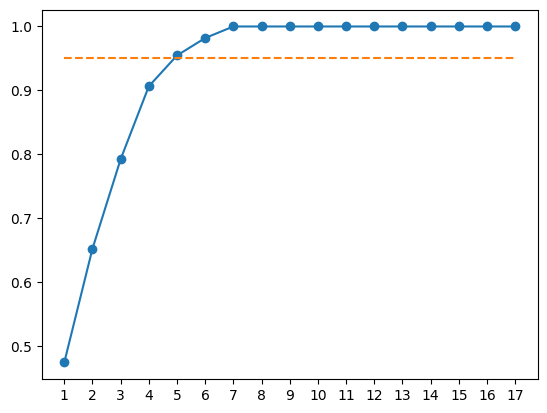

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca17 = PCA(n_components=17)
x_pca = pca17.fit_transform(df)

l2 = []
for i in np.arange(1, 18, 1):
    l2.append(0.95)

plt.plot(np.arange(1, 18, 1), np.cumsum(pca17.explained_variance_ratio_),marker='o')
plt.plot(np.arange(1, 18, 1), l2, ls='--')
plt.xticks(np.arange(1, 18, 1))
plt.show()

In [ ]:
# --- Transform into Array ---
X = np.asarray(X)

# --- Applying PCA ---
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

**Clustering Models**

**Hierarchical (AgglomerativeClustering)**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

First We have to find out the optimal no.(K value) of Cluster for Agglomerative Clustering

In [ ]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2,11):
    AG = AgglomerativeClustering (n_clusters = k)
    AG.fit (X)

    score = silhouette_score (X , AG.fit_predict(X))
    silhouette.append (score)

    score1 = calinski_harabasz_score (X, AG.fit_predict(X))
    calinski_harabasz.append(score1)

    score2 = davies_bouldin_score (X, AG.fit_predict(X))
    davies_bouldin.append (score2)

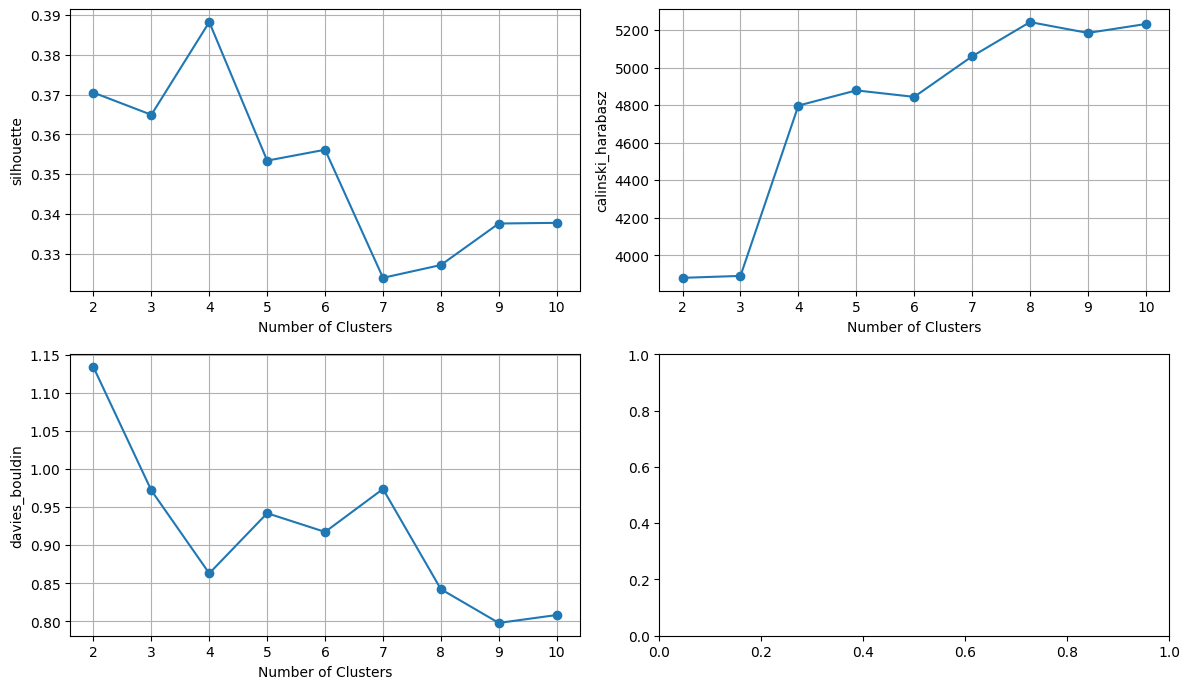

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
linkage_values = ['ward' , 'complete', 'average', 'single']
for i in linkage_values:
    AG = AgglomerativeClustering (n_clusters = 4 , linkage = i)
    AG.fit (X)
    score = silhouette_score(X, AG.fit_predict(X))
    silhouette.append(score)
    score1 = calinski_harabasz_score (X, AG.fit_predict(X))
    calinski_harabasz.append(score1)
    score2 = davies_bouldin_score (X, AG.fit_predict(X))
    davies_bouldin.append (score2)

df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_calinski_harabasz = pd.DataFrame(calinski_harabasz, columns=['calinski_harabasz'])
df_davies_bouldin = pd.DataFrame(davies_bouldin , columns=['davies_bouldin'])
df_linkage = pd.DataFrame(linkage_values, columns=['linkage'])

result = pd.concat([df_linkage, df_silhouette , df_calinski_harabasz , df_davies_bouldin], axis=1)
result

,linkage,silhouette_score,calinski_harabasz,davies_bouldin
0,ward,0.388287,4797.510291,0.863111
1,complete,0.667044,1117.665224,0.535723
2,average,0.747949,306.861271,0.431229
3,single,0.871517,105.981663,0.081181


In [ ]:
#  Define functions for visualization
def plot1 (model):
    labels = model.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [ ]:
AGV = df.copy ()
AG = AgglomerativeClustering (n_clusters = 4 , linkage = 'ward')
AG.fit (X)
AGV ['cluster'] = AG.fit_predict (X)

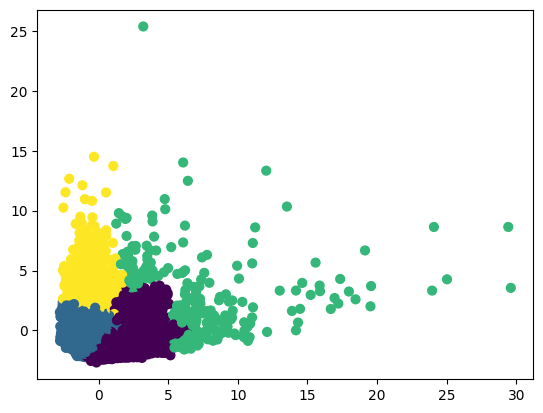

In [ ]:
plot1(AG)

**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
silhouette = []
calinski_harabasz = []
davies_bouldin = []
wcss = []

for k in range(2,11):
    kmeans =  KMeans(n_clusters = k, n_init = 10)
    kmeans.fit (X)

    # Calculate WCSS
    wcss.append(kmeans.inertia_)

    score = silhouette_score (X , kmeans.fit_predict(X))
    silhouette.append (score)

    score1 = calinski_harabasz_score (X, kmeans.fit_predict(X))
    calinski_harabasz.append(score1)

    score2 = davies_bouldin_score (X, kmeans.fit_predict(X))
    davies_bouldin.append (score2)




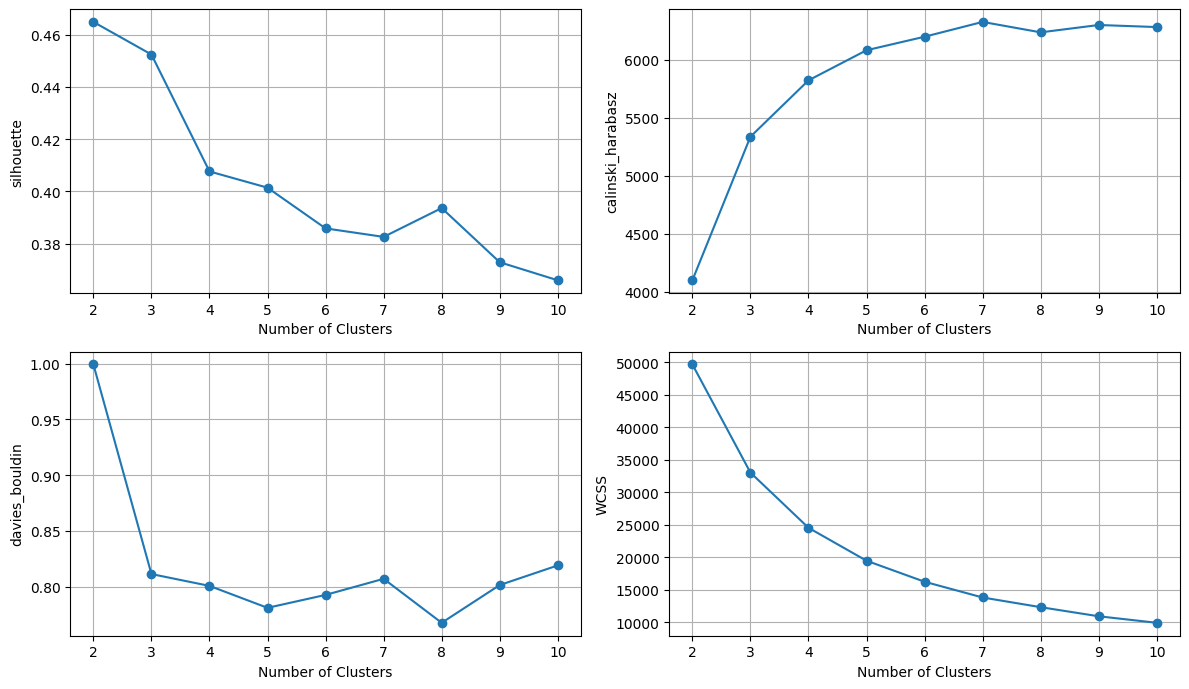

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin,'WCSS':wcss}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4 , n_init = 10)
kmeans.fit (X)

KMeans(n_clusters=4, n_init=10)

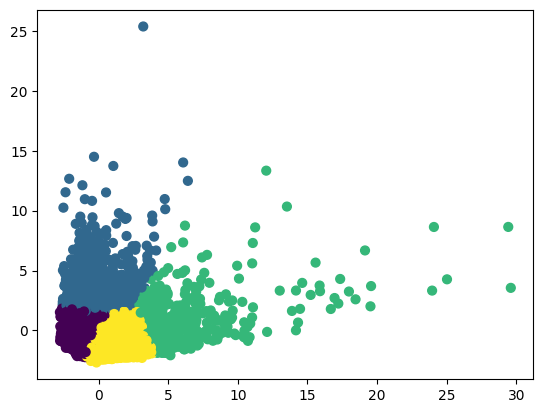

In [ ]:
plot1(kmeans)

In [ ]:
kmeans = KMeans(n_clusters = 3 , n_init = 10)
kmeans.fit (X)

KMeans(n_clusters=3, n_init=10)

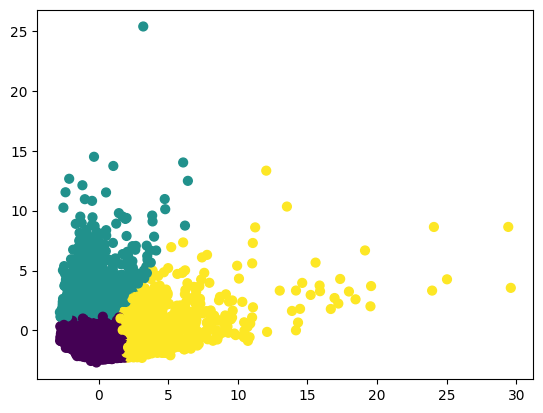

In [ ]:
plot1(kmeans)